<a href="https://colab.research.google.com/github/jyotidabass/-TensorFlow-text-classification-using-Python/blob/main/TensorFlow_text_classification_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**TensorFlow text classification using Python**

In [1]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data_x = [
 'good',  'well done', 'nice', 'Excellent',
 'Bad', 'OOps I hate it deadly', 'embrassing', 
'A piece of shit']

In [4]:
data_x = [
 'good',  'well done', 'nice', 'Excellent',
 'Bad', 'OOps I hate it deadly', 'embrassing', 
'A piece of shit']

label_x = np.array([1,1,1,1, 0,0,0,0])

In [5]:
data_x = [
 'good',  'well done', 'nice', 'Excellent',
 'Bad', 'OOps I hate it deadly', 'embrassing', 
'A piece of shit']

label_x = np.array([1,1,1,1, 0,0,0,0])

one_hot_x = [tf.keras.preprocessing.text.one_hot(d, 50) for d in data_x]

print(one_hot_x)

[[18], [8, 23], [32], [27], [8], [21, 3, 30, 35, 36], [7], [8, 22, 12, 20]]


In [6]:
data_x = [
 'good',  'well done', 'nice', 'Excellent',
 'Bad', 'OOps I hate it deadly', 'embrassing', 
'A piece of shit']

label_x = np.array([1,1,1,1, 0,0,0,0])

# one hot encoding 

one_hot_x = [tf.keras.preprocessing.text.one_hot(d, 50) for d in data_x]

# padding 

padded_x = tf.keras.preprocessing.sequence.pad_sequences(one_hot_x, maxlen=4, padding = 'post')

print(padded_x)

[[18  0  0  0]
 [ 8 23  0  0]
 [32  0  0  0]
 [27  0  0  0]
 [ 8  0  0  0]
 [ 3 30 35 36]
 [ 7  0  0  0]
 [ 8 22 12 20]]


In [7]:
sample_data = np.array([[1], [4]], dtype='int32')

emb_layer = tf.keras.layers.Embedding(50, 4, input_length=4)

print(emb_layer(sample_data))

tf.Tensor(
[[[ 0.04703176 -0.02752329  0.00813993 -0.00733078]]

 [[ 0.0242419   0.03352967  0.01008413  0.03010775]]], shape=(2, 1, 4), dtype=float32)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(50, 8, input_length=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
 ])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', 
metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


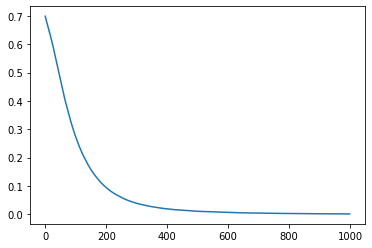

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

data_x = [
 'good',  'well done', 'nice', 'Excellent',
 'Bad', 'OOps I hate it deadly', 'embrassing', 
'A piece of shit']

label_x = np.array([1,1,1,1, 0,0,0,0])

# one hot encoding 

one_hot_x = [tf.keras.preprocessing.text.one_hot(d, 50) for d in data_x]

# padding 

padded_x = tf.keras.preprocessing.sequence.pad_sequences(one_hot_x, maxlen=4, padding = 'post')

# Architecting our Model 

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(50, 8, input_length=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
 ])

# specifying training params 

model.compile(optimizer='adam', loss='binary_crossentropy', 
metrics=['accuracy'])

history = model.fit(padded_x, label_x, epochs=1000, 
batch_size=2, verbose=0)

# plotting training graph

plt.plot(history.history['loss'])

In [11]:
def predict(word):
    one_hot_word = [tf.keras.preprocessing.text.one_hot(word, 50)]
    pad_word = tf.keras.preprocessing.sequence.pad_sequences(one_hot_word, maxlen=4,  padding='post')
    result = model.predict(pad_word)
    if result[0][0]>0.1:
        print('you look positive')
    else:
        print('damn you\'re negative')